In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/project3

/content/drive/MyDrive/project3


In [4]:
! pip install -q transformers[sentencepiece] fastbook fastai ohmeow-blurr nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 65.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 61.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 63.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [5]:
import torch
from transformers import AutoModelForSequenceClassification, AutoConfig
from fastai.text.all import *
from blurr.text.data.all import *
from blurr.text.modeling.all import *

/usr/local/lib/python3.10/dist-packages/blurr/text/modeling/question_answering.py:31: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  squad_metric = load_metric("squad")


In [6]:
df = pd.read_csv("/content/drive/MyDrive/project3/final_preprocessed_data.csv")
df

,Title,Description,Genre
0,Attack on Titan The Final Season: The Final Chapters,Final part of Attack on Titan The Final Season.,"['Action', 'Drama', 'Fantasy', 'Shounen', 'Dark Fantasy', 'Military', 'War', 'Based on a Manga']"
1,Fruits Basket the Final Season,The final arc of Fruits Basket.,"['Drama', 'Fantasy', 'Romance', 'Shoujo', 'Animal Transformation', 'Contemporary Fantasy', 'Curse', 'Dysfunctional Families', 'Mental Illness', 'Orphans', 'Zodiac', 'Based on a Manga']"
2,Fullmetal Alchemist: Brotherhood,"The foundation of alchemy is based on the law of equivalent exchange; you cannot produce something from nothing. As such, alchemy is bound by one taboo - human transmutation. Four years ago two young brothers, Edward and Alphonse Elric, broke this taboo when they tried to resurrect their dead mother. During the process Al's body disintegrated and Ed lost his leg. In a desperate attempt to prevent his brother from disappearing completely, Ed sacrificed one of his arms so he could affix Al's soul to a suit of armor. When his missing limbs are replaced by auto mail parts, Ed bears the name of...","['Action', 'Adventure', 'Drama', 'Fantasy', 'Mystery', 'Shounen', 'Conspiracy', 'Death of a Loved One', 'Military', 'Siblings', 'Based on a Manga']"
3,Demon Slayer: Kimetsu no Yaiba - Entertainment District Arc,"Tanjiro and his friends accompany the Hashira Tengen Uzui to an entertainment district where Tengen’s female ninja agents were gathering information on a demon before they suddenly disappeared. In order to investigate, Tanjiro and the others disguise themselves as women to sneak in!","['Action', 'Adventure', 'Shounen', 'Demons', 'Historical', 'Martial Arts', 'Orphans', 'Siblings', 'Supernatural', 'Swordplay', 'Based on a Manga']"
4,Bleach: Thousand-Year Blood War,"The peace is suddenly broken when warning sirens blare through the Soul Society. Residents there are disappearing without a trace and nobody knows who's behind it. Meanwhile, a dark shadow is also extending itself toward Ichigo and his friends in Karakura Town…","['Action', 'Comedy', 'Drama', 'Shounen', 'Afterlife', 'Ghosts', 'Shinigami', 'Supernatural', 'War', 'Based on a Manga']"
...,...,...,...
24332,Mitsuboshi Colors,"The ""Colors"" are three cute little girls who hang out together and say they're protecting the peace of their city. They have lots of fun together, doing stuff like playing games, solving puzzles, and going to the zoo. This anime follows their largely happy daily life.","['Fantasy', 'Comedy']"
24333,"Yuusha, Yamemasu","After saving the world, the strongest hero Leo became someone who is not wanted in the peaceful human world. He was too strong. Exiled, he seeks a job at the Demon King's Army, which he had defeated and needs to be rebuilt. The Army had many problems: too much work, financial troubles, etc. Leo starts to make things better using his power. Leo encounters Echidna again, and asks her why she invaded the human world. There was an unexpected story...!","['Adventure', 'Fantasy', 'Comedy', 'Shounen', 'Psychological']"
24334,Zoku Touken Ranbu: Hanamaru,Sequel of Touken Ranbu: Hanamaru.,"['Sci-Fi', 'Fantasy', 'Mystery', 'Horror', 'Psychological', 'Thriller']"
24335,Blue Blink,Story of a young boy named Kakeru and his adventures together with a magical blue pony named Blink.,"['Ecchi', 'Comedy', 'Shounen', 'School', 'Romance']"


In [7]:
df = df.dropna().reset_index(drop=True)

genre_list = []
indices_to_drop = []

for idx, genres in enumerate(df.Genre.to_list()):
  genres_list = eval(genres)
  if len(genres_list)>=2:
    genre_list.append(genres_list[0])
  else:
    indices_to_drop.append(idx)

df = df.drop(indices_to_drop).reset_index(drop=True)

df.shape

(24117, 3)

In [8]:
df=df.drop_duplicates(keep="first")

In [9]:
df.shape

(22724, 3)

In [10]:
df

,Title,Description,Genre
0,Attack on Titan The Final Season: The Final Chapters,Final part of Attack on Titan The Final Season.,"['Action', 'Drama', 'Fantasy', 'Shounen', 'Dark Fantasy', 'Military', 'War', 'Based on a Manga']"
1,Fruits Basket the Final Season,The final arc of Fruits Basket.,"['Drama', 'Fantasy', 'Romance', 'Shoujo', 'Animal Transformation', 'Contemporary Fantasy', 'Curse', 'Dysfunctional Families', 'Mental Illness', 'Orphans', 'Zodiac', 'Based on a Manga']"
2,Fullmetal Alchemist: Brotherhood,"The foundation of alchemy is based on the law of equivalent exchange; you cannot produce something from nothing. As such, alchemy is bound by one taboo - human transmutation. Four years ago two young brothers, Edward and Alphonse Elric, broke this taboo when they tried to resurrect their dead mother. During the process Al's body disintegrated and Ed lost his leg. In a desperate attempt to prevent his brother from disappearing completely, Ed sacrificed one of his arms so he could affix Al's soul to a suit of armor. When his missing limbs are replaced by auto mail parts, Ed bears the name of...","['Action', 'Adventure', 'Drama', 'Fantasy', 'Mystery', 'Shounen', 'Conspiracy', 'Death of a Loved One', 'Military', 'Siblings', 'Based on a Manga']"
3,Demon Slayer: Kimetsu no Yaiba - Entertainment District Arc,"Tanjiro and his friends accompany the Hashira Tengen Uzui to an entertainment district where Tengen’s female ninja agents were gathering information on a demon before they suddenly disappeared. In order to investigate, Tanjiro and the others disguise themselves as women to sneak in!","['Action', 'Adventure', 'Shounen', 'Demons', 'Historical', 'Martial Arts', 'Orphans', 'Siblings', 'Supernatural', 'Swordplay', 'Based on a Manga']"
4,Bleach: Thousand-Year Blood War,"The peace is suddenly broken when warning sirens blare through the Soul Society. Residents there are disappearing without a trace and nobody knows who's behind it. Meanwhile, a dark shadow is also extending itself toward Ichigo and his friends in Karakura Town…","['Action', 'Comedy', 'Drama', 'Shounen', 'Afterlife', 'Ghosts', 'Shinigami', 'Supernatural', 'War', 'Based on a Manga']"
...,...,...,...
24112,Mitsuboshi Colors,"The ""Colors"" are three cute little girls who hang out together and say they're protecting the peace of their city. They have lots of fun together, doing stuff like playing games, solving puzzles, and going to the zoo. This anime follows their largely happy daily life.","['Fantasy', 'Comedy']"
24113,"Yuusha, Yamemasu","After saving the world, the strongest hero Leo became someone who is not wanted in the peaceful human world. He was too strong. Exiled, he seeks a job at the Demon King's Army, which he had defeated and needs to be rebuilt. The Army had many problems: too much work, financial troubles, etc. Leo starts to make things better using his power. Leo encounters Echidna again, and asks her why she invaded the human world. There was an unexpected story...!","['Adventure', 'Fantasy', 'Comedy', 'Shounen', 'Psychological']"
24114,Zoku Touken Ranbu: Hanamaru,Sequel of Touken Ranbu: Hanamaru.,"['Sci-Fi', 'Fantasy', 'Mystery', 'Horror', 'Psychological', 'Thriller']"
24115,Blue Blink,Story of a young boy named Kakeru and his adventures together with a magical blue pony named Blink.,"['Ecchi', 'Comedy', 'Shounen', 'School', 'Romance']"


In [11]:
shuffled_df = df.sample(frac=1)
df = shuffled_df.reset_index(drop=True)
df.shape

(22724, 3)

In [12]:
genres_list = df.Genre.to_list()
genre_count = {}
for genres in genres_list:
  genre_list = eval(genres)
  for genre in genre_list:
    if genre in genre_count.keys():
      genre_count[genre] += 1
    else:
      genre_count[genre] = 1
print(f"Number of Genres: {len(genre_count)}")
print(genre_count)

Number of Genres: 613
{'Drama': 4540, 'Fantasy': 6089, 'Animal Protagonists': 400, 'Coming of Age': 88, 'Countryside': 111, 'Death of a Loved One': 43, 'Melancholy': 99, 'Non-Human Protagonists': 884, 'Orphans': 108, 'Revenge': 55, 'Sheep': 2, 'Weak to Strong': 20, 'Based on a Novel': 232, 'Comedy': 9207, 'School': 2538, 'Romance': 4322, 'Action': 7885, 'Mecha': 1609, 'Sci-Fi': 2923, 'Adventure': 4613, 'Magic': 1888, 'Shounen': 4957, 'Slice of Life': 3255, 'Sci Fi': 1206, 'Military': 1018, 'Robots': 179, 'Based on a Video Game': 300, 'Classical Music': 17, 'Mansion': 21, 'Music': 591, 'Original Work': 1080, 'Super Power': 787, 'Mystery': 1325, 'Josei': 169, 'Childhood Friends': 35, 'Romantic Comedy': 58, 'Short Episodes': 752, 'Tsundere': 40, 'Based on a Manga': 2431, 'Mahou Shoujo': 72, 'Martial Arts': 582, 'Parody': 579, 'Aliens': 231, 'Ecchi': 1806, 'Sports': 929, 'Shoujo Ai': 164, 'Child Protagonists': 182, 'Yaoi': 129, 'Shounen Ai': 271, 'Harem': 1041, 'School Life': 900, 'Sibling

In [13]:
# threshold = int(len(df) * 0.01)
threshold = int(len(df) * 0.01)
rare_genres = [key for key, value in genre_count.items() if value < threshold]
len(rare_genres), rare_genres[:5]

(557,
 ['Coming of Age',
  'Countryside',
  'Death of a Loved One',
  'Melancholy',
  'Orphans'])

In [14]:
genres_list = df.Genre.to_list()
revised_genre_list = []
indices_to_drop = []

for idx, genres in enumerate(genres_list):
  genre_list = eval(genres)
  revised_genres = []

  for genre in genre_list:
    if genre not in rare_genres:
      revised_genres.append(genre)

  if len(revised_genres) == 0:
    indices_to_drop.append(idx)
  else:
    revised_genre_list.append(revised_genres)
df = df.drop(df.index[indices_to_drop]).reset_index(drop=True)
# df = df.drop(indices_to_drop).reset_index(drop=True)
df.shape

(22576, 3)

In [15]:
df['revised_genres'] = revised_genre_list

In [16]:
revised_genres_list = df.revised_genres.to_list()
revised_genre_count = {}
for genres in revised_genres_list:
  genre_list = genres
  for genre in genre_list:
    if genre in revised_genre_count.keys():
      revised_genre_count[genre] += 1
    else:
      revised_genre_count[genre] = 1
print(f"Number of Genres: {len(revised_genre_count)}")
print(revised_genre_count)

Number of Genres: 56
{'Drama': 4540, 'Fantasy': 6089, 'Animal Protagonists': 400, 'Non-Human Protagonists': 884, 'Based on a Novel': 232, 'Comedy': 9207, 'School': 2538, 'Romance': 4322, 'Action': 7885, 'Mecha': 1609, 'Sci-Fi': 2923, 'Adventure': 4613, 'Magic': 1888, 'Shounen': 4957, 'Slice of Life': 3255, 'Sci Fi': 1206, 'Military': 1018, 'Based on a Video Game': 300, 'Music': 591, 'Original Work': 1080, 'Super Power': 787, 'Mystery': 1325, 'Short Episodes': 752, 'Based on a Manga': 2431, 'Martial Arts': 582, 'Parody': 579, 'Aliens': 231, 'Ecchi': 1806, 'Sports': 929, 'Shounen Ai': 271, 'Harem': 1041, 'School Life': 900, 'Space': 384, 'Supernatural': 3068, 'Superpowers': 361, 'Based on a Light Novel': 535, 'Person in a Strange World': 256, 'Game': 342, 'CG Animation': 475, 'Psychological': 735, 'Family Friendly': 734, 'Shoujo': 1166, 'Seinen': 2015, 'Samurai': 348, 'Shorts': 652, 'Demons': 604, 'Horror': 789, 'Contemporary Fantasy': 235, 'Chinese Animation': 543, 'Historical': 1288, '

In [17]:
encode_genre_types = { key: idx for idx, (key, value) in enumerate(revised_genre_count.items())}
with open("genre_types_encoded.json", "w") as fp:
  json.dump(encode_genre_types, fp)

In [18]:
categorical_genre_list = []
revised_genres_list = df.revised_genres.to_list()

for revised_genres in revised_genres_list:
  categorical_list = [0] * len(encode_genre_types)
  for genre in revised_genres:
    genre_type_index = encode_genre_types[genre]
    categorical_list[genre_type_index] = 1
  categorical_genre_list.append(categorical_list)

categorical_genre_list[2][:40]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [19]:
df['genre_cat_list'] = categorical_genre_list
df

,Title,Description,Genre,revised_genres,genre_cat_list
0,Ado: Hanabi,"The official music video for Hanabi, by Ado","['Drama', 'Fantasy', 'Animal Protagonists', 'Coming of Age', 'Countryside', 'Death of a Loved One', 'Melancholy', 'Non-Human Protagonists', 'Orphans', 'Revenge', 'Sheep', 'Weak to Strong', 'Based on a Novel']","[Drama, Fantasy, Animal Protagonists, Non-Human Protagonists, Based on a Novel]","[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
1,Akai Rousoku to Ningyo,"The mermaid's mother entrusts her daughter's mermaid to the longing human society, but that longing is betrayed by human desires. Picture book writer Nagata visualizes the sadness of beautiful mermaids and humans.","['Drama', 'Comedy', 'School', 'Romance']","[Drama, Comedy, School, Romance]","[1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
2,Saki,"Saki Miyanaga is a high school freshman who doesn't like mahjong. Ever since she was a child, she would lose her New Year's gift money during her family mahjong game. If she won, her parents would be upset, and if she lost, well, she lost. As a result, she's learned to play in such a way that her score differential always remains ±0: not good enough to win, but not bad enough to lose. When we meet her, she's being dragged to her school's mahjong club by an old friend. How will a girl who hates mahjong, yet has become adept at the game as a result of her upbringing, survive in this environm...","['Action', 'Mecha', 'Sci-Fi']","[Action, Mecha, Sci-Fi]","[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
3,No Game No Life Specials,Specials included on the Blu-ray/DVD volumes.,"['Action', 'Adventure', 'Fantasy', 'Magic']","[Action, Adventure, Fantasy, Magic]","[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
4,Edens Zero,"At Granbell Kingdom, an abandoned amusement park, Shiki has lived his entire life among machines. But one day, Rebecca and her cat companion Happy appear at the park's front gates. Little do these newcomers know that this is the first human contact Granbell has had in a hundred years! As Shiki stumbles his way into making new friends, his former neighbors stir at an opportunity for a robo-rebellion… And when his old homeland becomes too dangerous, Shiki must join Rebecca and Happy on their spaceship and escape into the boundless cosmos.","['Comedy', 'Shounen', 'Slice of Life']","[Comedy, Shounen, Slice of Life]","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
...,...,...,...,...,...
22571,To Be Hero,"Our main character, Ossan, is a no-good father with a messy appearance even though he looks nice, and decorates restrooms. He is a divorced, single-dad and lives with his daughter Min-chan, who is good at both studying and sport. One day, Ossan has been sucked into the toilet that he finished using, and becomes a hero to save the Earth! The price is he lost his ikemen appearance and becomes a fat person!! Ossan’s battle to protect the Earth and Min-chan has begun…","['Comedy', 'Slice of Life', 'Mahou Shoujo']","[Comedy, Slice of Life]","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
22572,Cinderella Girls Gekijou 2nd Season,Second season of Cinderella Girls Gekijou.,"['Comedy', 'Slice of Life']","[Comedy, Slice of Life]","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [20]:
labels = list(encode_genre_types.keys())

In [21]:
model_name = "distilroberta-base"
model_cls = AutoModelForSequenceClassification
config = AutoConfig.from_pretrained(model_name)
config.num_labels = len(labels)

hf_arch, hf_config, hf_tokenizer, hf_model = get_hf_objects(model_name, model_cls=model_cls, config=config)
hf_model.config.problem_type = "multi_label_classification"

In [22]:
blocks = (TextBlock(hf_arch, hf_config, hf_tokenizer, hf_model), MultiCategoryBlock(encoded=True,vocab=labels))
dblock = DataBlock(blocks=blocks, get_x=ColReader('Description'), get_y=ColReader('genre_cat_list'), splitter=RandomSplitter(valid_pct=0.1, seed=42))

In [23]:
dls = dblock.dataloaders(df, bs=32)
torch.save(dls, "dataloader/dls-multilabel-cartoon-classifier.pkl")

In [24]:
model = BaseModelWrapper(hf_model)

acc_02 = partial(accuracy_multi, thresh=0.2)

learner = Learner(dls,
                  model,
                  opt_func=partial(OptimWrapper, opt=torch.optim.AdamW),
                  loss_func=BCEWithLogitsLossFlat(),
                  metrics=[acc_02],
                  cbs=[BaseModelCallback],
                  splitter=blurr_splitter
                  ).to_fp16()

In [25]:
learner.model

BaseModelWrapper(
  (hf_model): RobertaForSequenceClassification(
    (roberta): RobertaModel(
      (embeddings): RobertaEmbeddings(
        (word_embeddings): Embedding(50265, 768, padding_idx=1)
        (position_embeddings): Embedding(514, 768, padding_idx=1)
        (token_type_embeddings): Embedding(1, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (encoder): RobertaEncoder(
        (layer): ModuleList(
          (0): RobertaLayer(
            (attention): RobertaAttention(
              (self): RobertaSelfAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=768, bias=True)
                (dropout): Dropout(p=0.1, inplace=False)
              )
              (output): RobertaSelfOutput(
                (dense): Li

In [26]:
learner.freeze()

SuggestedLRs(slide=0.0008317637839354575, valley=0.00013182566908653826)

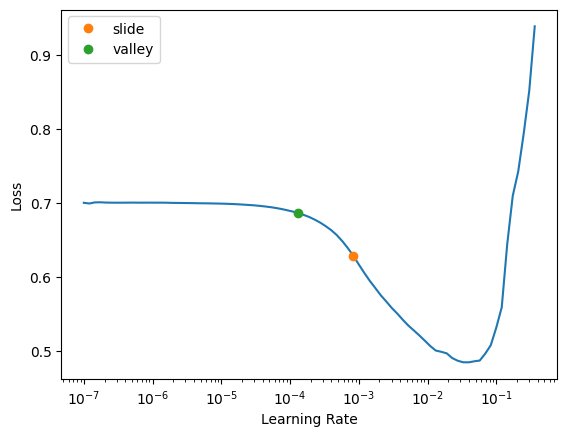

In [27]:
learner.lr_find(suggest_funcs=[slide, valley])

In [28]:
learner.fit_one_cycle(2,0.05)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.832267,0.562699,0.839175,01:00
1,0.238911,0.221355,0.912463,00:59


In [29]:
learner.save("cartoon-classifier-stage_colab-0")

Path('models/cartoon-classifier-stage_colab-0.pth')

In [30]:
learner.export("models/cartoon-classifier-stage_colab-0.pkl")

In [31]:
learner.unfreeze()

SuggestedLRs(slide=0.001737800776027143, valley=0.0014454397605732083)

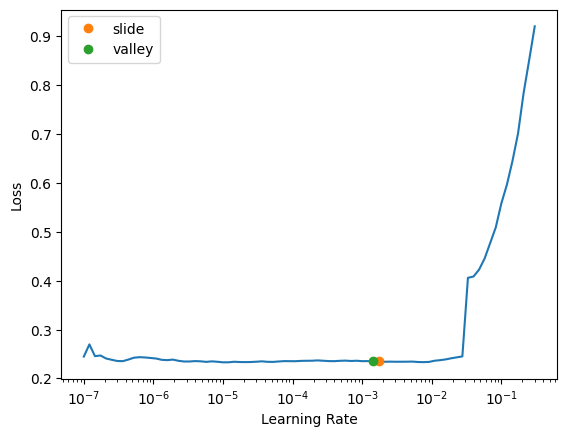

In [32]:
learner.lr_find(suggest_funcs=[slide, valley])

In [33]:
learner.fit_one_cycle(5,slice(.0010, .005))

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.258179,0.248295,0.885388,01:29
1,0.254118,0.240187,0.891591,01:29
2,0.234310,0.225320,0.889265,01:29
3,0.223414,0.219896,0.880697,01:29
4,0.217930,0.214676,0.901885,01:29


In [34]:
learner.save("cartoon-classifier-stage-1")

Path('models/cartoon-classifier-stage-1.pth')

In [35]:
learner.export("models/cartoon-classifier-stage-1.pkl")